<a href="https://colab.research.google.com/github/BrendaChepkoech/AUTOMOBILE-LOAN-DEFAULT-PREDICTION/blob/main/INSURANCE_PREDICTION_PROJECT_SPEED_RACERS_GROUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question

You have been appointed as the Lead Data Analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.

### b) Defining the Metric for Success

To be able to build a tensor flow model.

### c) Understanding the context 

Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm

### d) Recording the Experimental Design



*   Import the relevant libraries that we will use in our analysis.

* Read and explore the dataset we will use for our project.

* Define the appropriateness of the available data with regards to the project.

* Find and deal with outliers, anomalies, and missing data within the dataset.

* Perform univariate and bivariate analysis while recording our observations.

* Implement the solution by using tensor flow.

* Challenge the solution by giving insights on how we can optimize the models to give us a better performance as compared to the baseline model.

* Provide recommendations based on the whole analysis and modelling techniques used in the project.

### e) Data Relevance

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", -1)

def_variables = pd.read_csv('VariableDescription.csv')
def_variables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,"duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months = 0.5"
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-Not Painted)"
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not Fenced)"
6,Garden,building has garden or not (V-has garden; O-no garden)
7,Settlement,Area where the building is located. (R- rural area; U- urban area)
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


### Importing Relevant Libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## 2. Reading the Data

In [ ]:
# Loading the Dataset

df_ins = pd.read_csv('train_data.csv')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#

print('This dataset has',df_ins.shape[0], 'rows and',df_ins.shape[1], 'columns.')

This dataset has 7160 rows and 14 columns.


In [ ]:
# Previewing the top of our dataset
#

df_ins.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
# Previewing the bottom of our dataset
# 

df_ins.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [ ]:
# Checking whether each column has an appropriate datatype
#

df_ins.dtypes

Customer Id           object 
YearOfObservation     int64  
Insured_Period        float64
Residential           int64  
Building_Painted      object 
Building_Fenced       object 
Garden                object 
Settlement            object 
Building Dimension    float64
Building_Type         int64  
Date_of_Occupancy     float64
NumberOfWindows       object 
Geo_Code              object 
Claim                 int64  
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

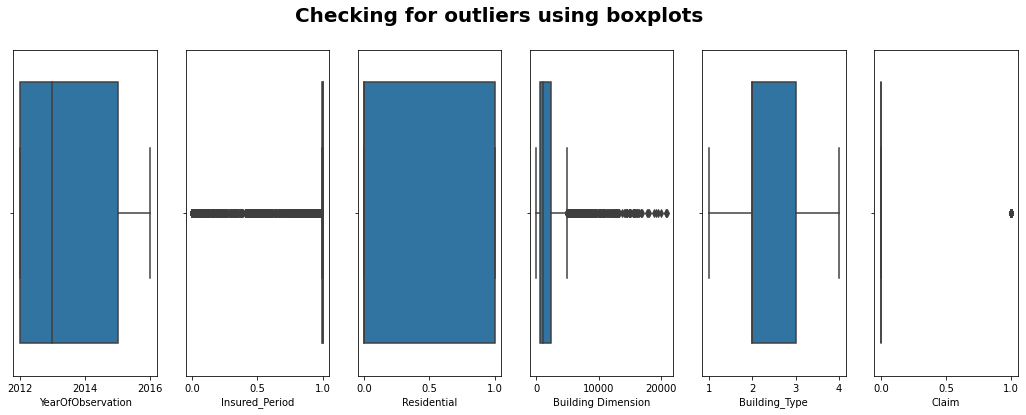

In [ ]:
# Checking for Outliers
#


col_names = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Claim']


fig, axes = plt.subplots(nrows=1,ncols=6,figsize=(18,6))
plt.suptitle('Checking for outliers using boxplots',fontsize=20,weight='bold',color='black')
for ax, data, column in zip(axes.flatten(),df_ins,col_names):
  sns.boxplot(df_ins[column],ax=ax)
  

In [ ]:
# Checking for Duplicates
#

df_ins.duplicated().sum()

0

In [ ]:
# Identifying the Missing Data
#

df_ins.isnull().sum()

Customer Id           0  
YearOfObservation     0  
Insured_Period        0  
Residential           0  
Building_Painted      0  
Building_Fenced       0  
Garden                7  
Settlement            0  
Building Dimension    106
Building_Type         0  
Date_of_Occupancy     508
NumberOfWindows       0  
Geo_Code              102
Claim                 0  
dtype: int64

In [ ]:
# Dealing with the Missing Data
#We will drip the date column and fill in the dimension coulumn with the mean and drop the rows that are missing the Geo_cODE
#
df_ins = df_ins.drop(['Date_of_Occupancy'], axis =1)
df_ins['Building Dimension'] = df_ins['Building Dimension'].fillna(df_ins['Building Dimension'].mean())
df_ins.dropna(subset = ["Geo_Code"], inplace=True)
df_ins['Garden'] = df_ins['Garden'].fillna('O')
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7058 entries, 0 to 7057
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7058 non-null   object 
 1   YearOfObservation   7058 non-null   int64  
 2   Insured_Period      7058 non-null   float64
 3   Residential         7058 non-null   int64  
 4   Building_Painted    7058 non-null   object 
 5   Building_Fenced     7058 non-null   object 
 6   Garden              7058 non-null   object 
 7   Settlement          7058 non-null   object 
 8   Building Dimension  7058 non-null   float64
 9   Building_Type       7058 non-null   int64  
 10  NumberOfWindows     7058 non-null   object 
 11  Geo_Code            7058 non-null   object 
 12  Claim               7058 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 772.0+ KB


The logic behind the previous decision is that we can fill in the missing date rows so it would be better to drop it as we are not doing a time series analysis. The second is the bulding dimensions are not too spread out so the mean works well and the missing geo code rows are few and we can assumed houses without gardens mention ussually dont have gardens

In [ ]:
# Changing column names to lower case
#

df_ins.columns = df_ins.columns.str.lower()

df_ins.head(1)

,customer id,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building dimension,building_type,numberofwindows,geo_code,claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,.,1053,0


In [ ]:
# change the classes in the various columns

df_ins['building_painted'] = df_ins['building_painted'].replace({'V':'not painted','N':'painted'})

df_ins['settlement'] = df_ins['settlement'].replace({'R':'rural','U':'urban'})

df_ins['building_fenced'] = df_ins['building_fenced'].replace({'N':'fenced','V':'not fenced'})

df_ins['garden'] = df_ins['garden'].replace({'V':'has garden','O':'no garden'})


df_ins.head()

,customer id,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building dimension,building_type,numberofwindows,geo_code,claim
0,H14663,2013,1.0,0,painted,not fenced,has garden,urban,290.0,1,.,1053,0
1,H2037,2015,1.0,0,not painted,fenced,no garden,rural,490.0,1,4,1053,0
2,H3802,2014,1.0,0,painted,not fenced,has garden,urban,595.0,1,.,1053,0
3,H3834,2013,1.0,0,not painted,not fenced,has garden,urban,2840.0,1,.,1053,0
4,H5053,2014,1.0,0,not painted,fenced,no garden,rural,680.0,1,3,1053,0


## 6. Exploratory Analysis

### a) Univariate Analysis

i) Central Tendencies

In [ ]:
# Ploting the univariate summaries and recording our observations
#

# Finding the mean

num_cols = df_ins[['insured_period', 'building dimension']]

num_cols.mean()

insured_period        0.910284   
building dimension    1883.727530
dtype: float64

In [ ]:
# Finding the Mode

num_cols.mode()

,insured_period,building dimension
0,1.0,400.0


In [ ]:
# Finding Median 

num_cols.median()

insured_period        1.0   
building dimension    1083.5
dtype: float64

ii) Measure of Dispersion


In [ ]:
## Finding Variance
num_cols.var()

insured_period        5.724793e-02
building dimension    5.187061e+06
dtype: float64

In [ ]:
# Finding Standard Deviation
num_cols.std()

insured_period        0.239265   
building dimension    2277.512009
dtype: float64

In [ ]:
# Finding the Skewness 
num_cols.skew()

insured_period       -2.759070
building dimension    3.123674
dtype: float64

In [ ]:
# Finding kurtosis
num_cols.kurt()

insured_period        6.423945 
building dimension    13.471705
dtype: float64

iii) Categorical Data

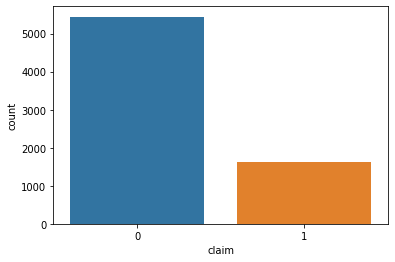

In [ ]:
# Understanding claims

sns.countplot(x= 'claim', data = df_ins)

There are significantly low number of claims.


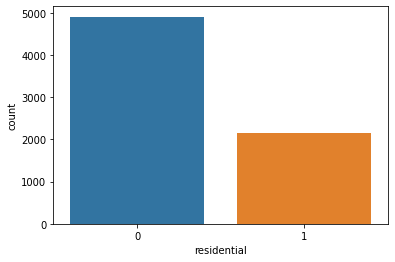

In [ ]:
# Count of buildings that are residential or not
sns.countplot(x= 'residential', data = df_ins)

Most buildings are not residential.

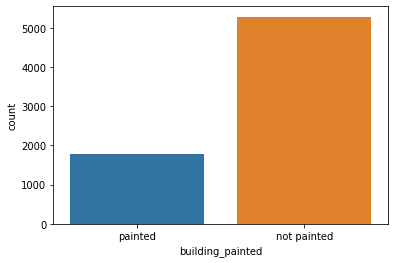

In [ ]:
# Count of the buildings painted or not
sns.countplot(x= 'building_painted', data = df_ins)

Most buldings in our dataset are not painted as compared to those that are painted.

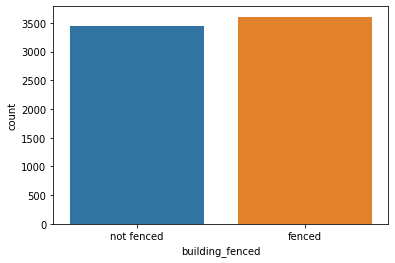

In [ ]:
# Understanding if the buildings are fenced or not
sns.countplot(x= 'building_fenced', data = df_ins)

Approximately, there is an equal number of buildings that are fenced as those that are not fenced.


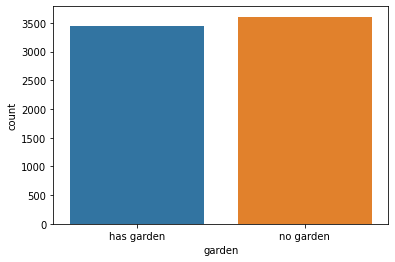

In [ ]:
# Count of buildings with gardens
sns.countplot(x= 'garden', data = df_ins)

There is an approximately equal number of those buildings with garden and those that do not have a garden.

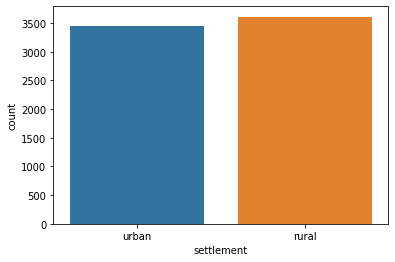

In [ ]:
# Understanding the settlement.
sns.countplot(x= 'settlement', data = df_ins)

There is an approximately equal number of buildings in urban settlement and those that are in rural settlement.

### b) Bivariate Analysis

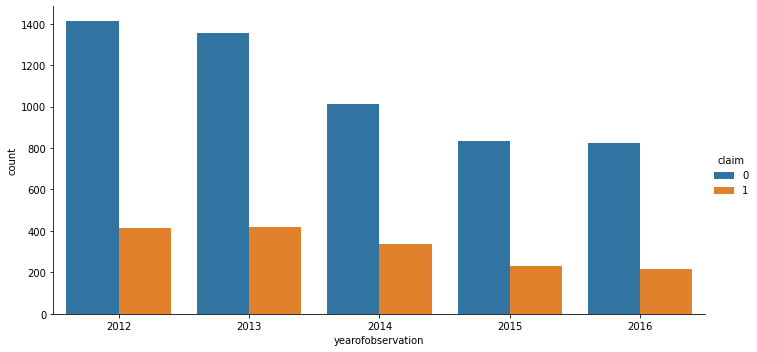

In [ ]:
# checking claims with the year of observation

sns.catplot(x='yearofobservation',hue='claim',data=df_ins,kind='count',aspect=2)

There seems to be a gradual decrease in the number of both claims and non-claims over the period of time of observation.

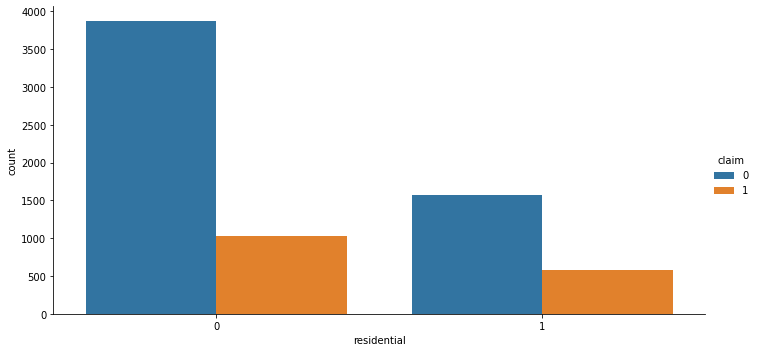

In [ ]:
# Understanding claims with residential status.
sns.catplot(x='residential',hue='claim',data=df_ins,kind='count',aspect=2)

More claims came from buildings that are not residential as compared to the claims from the residentials.

In [ ]:
#Correlation betwen features
cor = df_ins.corr()
cor

,yearofobservation,insured_period,residential,building dimension,building_type,claim
yearofobservation,1.000000,0.028677,-0.038406,0.009125,0.006797,-0.014694
insured_period,0.028677,1.000000,-0.038672,0.007446,-0.022081,0.086926
residential,-0.038406,-0.038672,1.000000,0.057459,0.334645,0.064343
building dimension,0.009125,0.007446,0.057459,1.000000,0.007935,0.297064
building_type,0.006797,-0.022081,0.334645,0.007935,1.000000,0.112052
claim,-0.014694,0.086926,0.064343,0.297064,0.112052,1.000000


From the correlation table, we can see that building type has the highest positive correlation with the claim, the larger the building the more likely the owners are to file claims

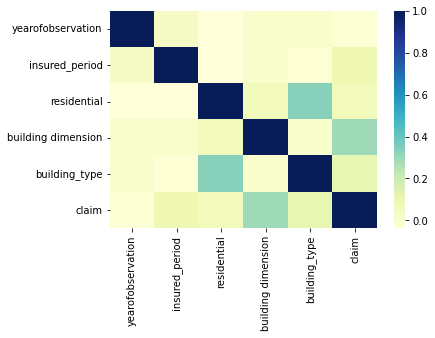

In [ ]:
#Visualizing our correlations with a heatmap 
sns.heatmap(cor, cmap="YlGnBu")
#the darker the color the higher the correlation

We have confrimed that the building dimesion has the highest claim, with if insured, type of residence & building type have a postive correlation with claim

Text(0.5, 1.0, 'Building dimensions by year of observation, Divided by those who filed claims')

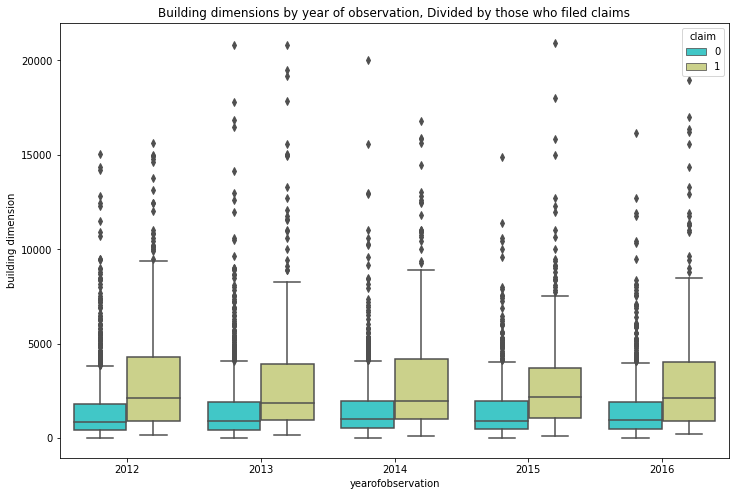

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='yearofobservation', y='building dimension', data=df_ins,  hue='claim', palette='rainbow')
plt.title("Building dimensions by year of observation, Divided by those who filed claims")


From the graph we can see that over the years building sizes stayed mostly around the same size. However the number of people who made claims has been consistenly higher than those who didnt. 

Text(0.5, 1.0, 'Insured period by year of observation, Segmented by those who filed claims')

<Figure size 1728x1152 with 0 Axes>

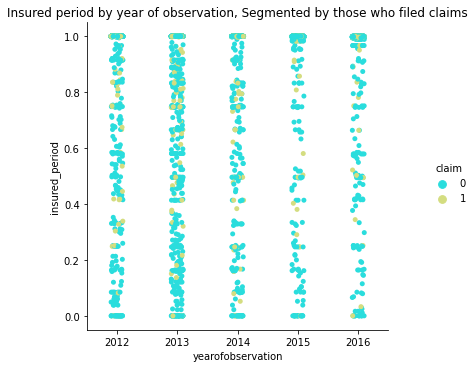

In [ ]:
plt.figure(figsize=(24,16))
sns.catplot(x='yearofobservation',y="insured_period",data=df_ins, hue='claim', palette='rainbow')
plt.title("Insured period by year of observation, Segmented by those who filed claims")

From the graph above we see that when it comes to making claims the length of the insure period doesnt matter. People who take out full year policiys and those who take 1/2 year are equally likely to make a claim

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# We will begin to train our models and assess their acuracy 
df_ins['claim'].unique()


array([0, 1])

In [ ]:
#Importing Tensor flow
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers
from tensorflow.keras import losses

2.7.0


In [ ]:
df = df_ins.copy()
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7058 entries, 0 to 7057
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer id         7058 non-null   object 
 1   yearofobservation   7058 non-null   int64  
 2   insured_period      7058 non-null   float64
 3   residential         7058 non-null   int64  
 4   building_painted    7058 non-null   object 
 5   building_fenced     7058 non-null   object 
 6   garden              7058 non-null   object 
 7   settlement          7058 non-null   object 
 8   building dimension  7058 non-null   float64
 9   building_type       7058 non-null   int64  
 10  numberofwindows     7058 non-null   object 
 11  geo_code            7058 non-null   object 
 12  claim               7058 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 1.1+ MB


In [ ]:
df.drop(['customer id'], axis =1,inplace=True)
#Removig the ids

In [ ]:
df.head(5)
#Performing label encoding for the object columns
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['building_painted'] = lb.fit_transform(df['building_painted'])
df['building_fenced'] = lb.fit_transform(df['building_fenced'])
df['garden'] = lb.fit_transform(df['garden'])
df['settlement'] = lb.fit_transform(df['settlement'])
df['numberofwindows'] = lb.fit_transform(df['numberofwindows'])
df['geo_code'] = lb.fit_transform(df['geo_code'])

df.head(5)

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building dimension,building_type,numberofwindows,geo_code,claim
0,2013,1.0,0,1,1,0,1,290.0,1,0,7,0
1,2015,1.0,0,0,0,1,0,490.0,1,4,7,0
2,2014,1.0,0,1,1,0,1,595.0,1,0,7,0
3,2013,1.0,0,0,1,0,1,2840.0,1,0,7,0
4,2014,1.0,0,0,0,1,0,680.0,1,3,7,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7058 entries, 0 to 7057
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yearofobservation   7058 non-null   int64  
 1   insured_period      7058 non-null   float64
 2   residential         7058 non-null   int64  
 3   building_painted    7058 non-null   int64  
 4   building_fenced     7058 non-null   int64  
 5   garden              7058 non-null   int64  
 6   settlement          7058 non-null   int64  
 7   building dimension  7058 non-null   float64
 8   building_type       7058 non-null   int64  
 9   numberofwindows     7058 non-null   int64  
 10  geo_code            7058 non-null   int64  
 11  claim               7058 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 1.0 MB


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['claim'], axis = 1)
y = df['claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a machine learning model

Build a tf.keras.Sequential model by stacking layers

In [ ]:
# Subject our features to LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
                                  
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)

,0
garden,4.458948
building_fenced,4.146547
insured_period,0.985002
settlement,0.926420
building_type,0.267397
numberofwindows,0.145659
residential,0.057857
building dimension,0.000318
geo_code,0.000052
yearofobservation,-0.040541


From our LDA we can see that garden, building_fenced, insured period , settlement, building type and number of windows hold more weight(in that order)

In [ ]:
#feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#loading the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
# creating an instance
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))


# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam')

fitting the model using 200 epochs

In [ ]:
# creating an instance
model = Sequential()

model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=12,activation='relu'))


# binary classification
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss ='binary_crossentropy',optimizer = 'Adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=200,validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
155/155 [==============================] - 1s 4ms/step - loss: 0.5908 - val_loss: 0.5228
Epoch 2/200
155/155 [==============================] - 0s 2ms/step - loss: 0.5464 - val_loss: 0.5145
Epoch 3/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5385 - val_loss: 0.5090
Epoch 4/200
155/155 [==============================] - 0s 2ms/step - loss: 0.5287 - val_loss: 0.4952
Epoch 5/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5159 - val_loss: 0.4797
Epoch 6/200
155/155 [==============================] - 0s 2ms/step - loss: 0.5042 - val_loss: 0.4698
Epoch 7/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5007 - val_loss: 0.4685
Epoch 8/200
155/155 [==============================] - 0s 3ms/step - loss: 0.4961 - val_loss: 0.4743
Epoch 9/200
155/155 [==============================] - 0s 3ms/step - loss: 0.4974 - val_loss: 0.4627
Epoch 10/200
155/155 [==============================] - 0s 2ms/step - loss: 0.4937 - val_lo

plotting losses to show the performance of the model

In [ ]:
model_loss = pd.DataFrame(model.history.history)

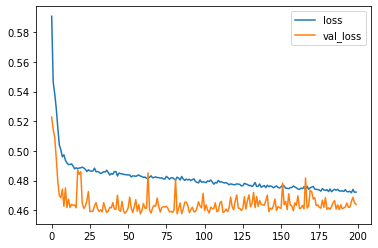

In [ ]:
model_loss.plot()

Looks like the loss keeps dropping with more epoch but the accuracy might platue at this point. Moving forward i will double the epochs to see if that leads to an improvement 

In [ ]:
#model prediction
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
predictions


array([[0.13560647],
       [0.08183426],
       [0.2951374 ],
       ...,
       [0.05258128],
       [0.4590874 ],
       [0.32726765]], dtype=float32)

In [ ]:
#model prediction
predictions = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix


print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[1597   70]
 [ 356   95]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.82      0.96      0.88      1667
           1       0.58      0.21      0.31       451

    accuracy                           0.80      2118
   macro avg       0.70      0.58      0.60      2118
weighted avg       0.77      0.80      0.76      2118



the model has an accuracy of 80% which is usable

### 9. Challenging the Solution

Using 400 epochs

In [ ]:
model.fit(x=X_train, y=y_train, epochs=400,validation_data=(X_test, y_test), verbose=1)

Epoch 1/400
155/155 [==============================] - 0s 3ms/step - loss: 0.4727 - val_loss: 0.4646
Epoch 2/400
155/155 [==============================] - 0s 3ms/step - loss: 0.4726 - val_loss: 0.4633
Epoch 3/400
155/155 [==============================] - 0s 3ms/step - loss: 0.4717 - val_loss: 0.4643
Epoch 4/400
155/155 [==============================] - 0s 2ms/step - loss: 0.4715 - val_loss: 0.4622
Epoch 5/400
155/155 [==============================] - 0s 2ms/step - loss: 0.4724 - val_loss: 0.4643
Epoch 6/400
155/155 [==============================] - 0s 3ms/step - loss: 0.4725 - val_loss: 0.4652
Epoch 7/400
155/155 [==============================] - 0s 3ms/step - loss: 0.4717 - val_loss: 0.4635
Epoch 8/400
155/155 [==============================] - 0s 3ms/step - loss: 0.4722 - val_loss: 0.4737
Epoch 9/400
155/155 [==============================] - 0s 3ms/step - loss: 0.4719 - val_loss: 0.4636
Epoch 10/400
155/155 [==============================] - 0s 3ms/step - loss: 0.4714 - val_lo

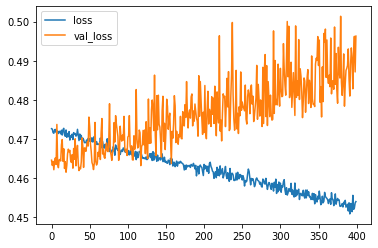

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
#Looks like it slightly improved the accuracy, lets check its metrics

In [ ]:
#model prediction
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
predictions


array([[0.07446632],
       [0.09114119],
       [0.3504004 ],
       ...,
       [0.08388963],
       [0.42834798],
       [0.39620203]], dtype=float32)

As this is a classification problem, we need to round it off to either 0 or one to fit within the classes

In [ ]:
#model prediction
predictions = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix


print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[1562  105]
 [ 342  109]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.82      0.94      0.87      1667
           1       0.51      0.24      0.33       451

    accuracy                           0.79      2118
   macro avg       0.66      0.59      0.60      2118
weighted avg       0.75      0.79      0.76      2118



We habe a current model accuracy of 79% using the Adma optimizer which is very good 

**Lets try out different optimizers**

**RmsProp**

In [ ]:
# creating an instance
model_v3 = Sequential()

model_v3.add(Dense(units=12,activation='relu'))
model_v3.add(Dense(units=12,activation='relu'))
model_v3.add(Dense(units=12,activation='relu'))
model_v3.add(Dense(units=12,activation='relu'))


# binary classification
model_v3.add(Dense(units=1,activation='sigmoid'))


model_v3.compile(loss ='binary_crossentropy',optimizer = 'RmsProp')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=200,validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
155/155 [==============================] - 0s 3ms/step - loss: 0.4532 - val_loss: 0.4857
Epoch 2/200
155/155 [==============================] - 1s 3ms/step - loss: 0.4509 - val_loss: 0.5026
Epoch 3/200
155/155 [==============================] - 0s 3ms/step - loss: 0.4552 - val_loss: 0.4904
Epoch 4/200
155/155 [==============================] - 0s 3ms/step - loss: 0.4562 - val_loss: 0.4808
Epoch 5/200
155/155 [==============================] - 0s 3ms/step - loss: 0.4543 - val_loss: 0.4877
Epoch 6/200
155/155 [==============================] - 0s 3ms/step - loss: 0.4521 - val_loss: 0.4846
Epoch 7/200
155/155 [==============================] - 0s 3ms/step - loss: 0.4550 - val_loss: 0.5100
Epoch 8/200
155/155 [==============================] - 0s 2ms/step - loss: 0.4540 - val_loss: 0.5092
Epoch 9/200
155/155 [==============================] - 0s 3ms/step - loss: 0.4542 - val_loss: 0.4855
Epoch 10/200
155/155 [==============================] - 1s 3ms/step - loss: 0.4530 - val_lo

In [ ]:
#model prediction
predictions = (model_v3.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix


print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[848 819]
 [265 186]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.76      0.51      0.61      1667
           1       0.19      0.41      0.26       451

    accuracy                           0.49      2118
   macro avg       0.47      0.46      0.43      2118
weighted avg       0.64      0.49      0.53      2118



This model had a low accuracy of 49% which is not usable for prediciting 

### Challenging the Solution

**AdaGrad**

In [ ]:
# creating an instance
model_v2 = Sequential()

model_v2.add(Dense(units=12,activation='relu'))
model_v2.add(Dense(units=12,activation='relu'))
model_v2.add(Dense(units=12,activation='relu'))
model_v2.add(Dense(units=12,activation='relu'))


# binary classification
model_v2.add(Dense(units=1,activation='sigmoid'))


model_v2.compile(loss ='binary_crossentropy',optimizer = 'AdaGrad')

In [ ]:
model_v2.fit(x=X_train, y=y_train, epochs=200,validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
155/155 [==============================] - 1s 4ms/step - loss: 0.6544 - val_loss: 0.6371
Epoch 2/200
155/155 [==============================] - 0s 3ms/step - loss: 0.6325 - val_loss: 0.6169
Epoch 3/200
155/155 [==============================] - 0s 3ms/step - loss: 0.6163 - val_loss: 0.6004
Epoch 4/200
155/155 [==============================] - 0s 2ms/step - loss: 0.6028 - val_loss: 0.5859
Epoch 5/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5910 - val_loss: 0.5732
Epoch 6/200
155/155 [==============================] - 0s 2ms/step - loss: 0.5809 - val_loss: 0.5623
Epoch 7/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5727 - val_loss: 0.5533
Epoch 8/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5663 - val_loss: 0.5463
Epoch 9/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5615 - val_loss: 0.5409
Epoch 10/200
155/155 [==============================] - 0s 3ms/step - loss: 0.5580 - val_lo

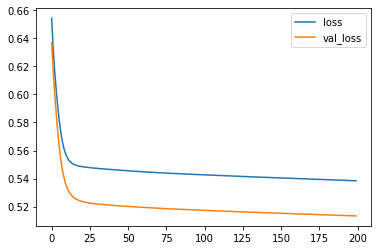

In [ ]:
model_loss = pd.DataFrame(model_v2.history.history)
model_loss.plot()

In [ ]:
#model prediction
predictions = (model_v2.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix


print('confusion matrix\n',confusion_matrix(y_test,predictions))
print('\n********************************************************')

print('\nclassification report\n',classification_report(y_test,predictions))

confusion matrix
 [[1667    0]
 [ 451    0]]

********************************************************

classification report
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1667
           1       0.00      0.00      0.00       451

    accuracy                           0.79      2118
   macro avg       0.39      0.50      0.44      2118
weighted avg       0.62      0.79      0.69      2118



* The accuracy of this model is 79% which is as high as our initial 400 epoch model, this sounds like the best one


## 9. Follow up questions

### a). Did we have the right data?

Yes, we had the right data.

### b). Do we need other data to answer our question?

The data we had was sufficient to answer the question. However we may need more data to train our model for higher accuracy.

### c). Did we have the right question?

Yes, we had the right question.

### Conclusion

Adam optimizer with binary_crossentropy as the loss function had the best f1 score for the classes although the overall f1 score was acceptable with about 76% the f1 score of class 1(claims) was low about 33% thus there is a need for more fine tuning to improve the scores